In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


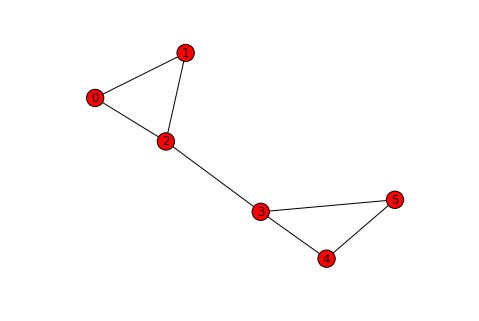

In [2]:
a = array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]])
G = nx.Graph(a)
nx.draw(G)

In [3]:
def cluster(vertex, graph, alpha = 1, classified = None, my_cluster = None):
    #print("stop", stop)
    
    n = graph.shape[0]
    internal_weights = graph[vertex].astype(float)    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)
    
    if (classified is None):
        unclassified = ones(n)
    else:
        unclassified = np.logical_not(classified)
    if (my_cluster is None):
        my_cluster = zeros(n)
    my_cluster[vertex] = 1
    #print("my_cluster",vertex, my_cluster)    
        
    #unclassified[vertex] = 0
    area = internal_weights[vertex]
    
    while (sum(unclassified) >0): 
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * unclassified)
        print("next vertex:",next_vertex, unclassified)
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex]) 
        print("alpha", this_alpha, "new ratio", temp_area[next_vertex]/temp_perimeter[next_vertex])
        if (this_alpha > alpha):
            print("alpha too big, ending")
            break
        if (my_cluster[next_vertex] == 0):
            print("not in the cluster!!!!")
            temp_out = cluster(next_vertex, graph, alpha,\
                               classified = np.logical_not(unclassified),my_cluster = my_cluster)
            #print("temp_out", temp_out)
            unclassified = np.logical_not(np.logical_or(temp_out,np.logical_not(unclassified)))
            print("still unraveling and unclassified", unclassified, my_cluster)
            break
        else:
            print("ok, we have a hit")
            #print("unclassified", unclassified, my_cluster)
            pass
        unclassified[next_vertex] = 0
        unclassified[vertex] = 0 #only necessary for the initial
        internal_weights += graph[next_vertex]
        perimeter = temp_perimeter[next_vertex]
        area = temp_area[next_vertex]
        print("unclassified", unclassified, my_cluster, np.logical_not(unclassified))
        if(np.dot(array(my_cluster),np.logical_not(unclassified)) == sum(my_cluster)):
            print("EQUAL!!!!")

    return np.logical_not(unclassified)
            
A = array(nx.adjacency_matrix(G))

this_cluster = cluster(0,A,1) 
this_cluster

next vertex: 1 [ 1.  1.  1.  1.  1.  1.]
alpha 0.0 new ratio 0.5
not in the cluster!!!!
next vertex: 0 [ True  True  True  True  True  True]
alpha 0.0 new ratio 0.5
ok, we have a hit
unclassified [False False  True  True  True  True] [ 1.  1.  0.  0.  0.  0.] [ True  True False False False False]
EQUAL!!!!
next vertex: 2 [False False  True  True  True  True]
alpha 0.166666666667 new ratio 3.0
not in the cluster!!!!
next vertex: 3 [False False  True  True  True  True]
alpha 0.0 new ratio 0.25
not in the cluster!!!!
next vertex: 4 [False False  True  True  True  True]
alpha 0.0 new ratio 0.333333333333
not in the cluster!!!!
next vertex: 5 [False False  True  True  True  True]
alpha 0.0 new ratio 0.5
not in the cluster!!!!
next vertex: 4 [False False  True  True  True  True]
alpha 0.0 new ratio 0.5
ok, we have a hit
unclassified [False False  True  True False False] [ 1.  1.  1.  1.  1.  1.] [ True  True False False  True  True]
next vertex: 3 [False False  True  True False False]
alpha 

array([ True,  True, False,  True,  True,  True], dtype=bool)

In [4]:
def get_closest(vertex,n,internal_weights,area,degrees,perimeter, classified = None):
    if (classified is None):
        classified = zeros(n)    
    temp_perimeter = perimeter - 2*internal_weights + degrees
    temp_area = area + internal_weights
    ratios = temp_area / (temp_perimeter + 0.000001) 
    next_vertex = np.argmax(ratios * (np.logical_not(classified)))
    return next_vertex
    

def cluster3(vertex, graph, alpha = 1, classified = None, my_cluster = None, backTrack = False, stop = 10):
    if(stop<=0):
        print("stopping from recursion depth")
        return None
    n = graph.shape[0]
    internal_weights = graph[vertex].astype(float)    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)
    
    if (classified is None):
        classified = zeros(n)
       
    else:
        assert (len(classified) == n), "fail"


    if (my_cluster is None):
        print("No cluster")
        my_cluster = zeros(n)
    my_cluster[vertex] = 1
    print()
    print("my_cluster",vertex, my_cluster) 
    print("classified from the top", classified) 
    if(backTrack):
        print()
        print("backTracking")
        print()
    #unclassified[vertex] = 0
    classified[vertex] = 1 #only necessary for the initial #hopefully
    area = internal_weights[vertex]
    
    while (sum(classified) < n): 
        stop -= 1
        if(stop < 0):
            print("stopping in the while")
            break
        print("classified from the while", classified)
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * (np.logical_not(classified)))
        #other_v = get_closest(vertex, graph)
        print("classified", classified, my_cluster)
        print("cur vertex:",vertex,"next vertex:",next_vertex, classified)
        #print()
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex]) 
        print("alpha", this_alpha, "new ratio", temp_area[next_vertex]/temp_perimeter[next_vertex])
        if (this_alpha > alpha):
            print("alpha too big, ending")
            break
        if (my_cluster[next_vertex] == 0):
            print("not in the cluster!!!!, clustering on", next_vertex)
            temp_out = cluster3(next_vertex, graph, alpha,\
                               classified = None,my_cluster = my_cluster, backTrack = True, stop = stop -1)
            print("temp_out", temp_out)
            print()
            difference = np.logical_and(temp_out ,np.logical_not(classified))
            print("difference",np.logical_and(temp_out ,np.logical_not(classified)))
            print()
            print("classified", classified, my_cluster)
            for i, e in enumerate(difference):
                
                if(e == 1):
                    print(i)
                
            classified[next_vertex] = 1
            #classified[vertex] = 1 #only necessary for the initial
            print("classified", classified, my_cluster)
            internal_weights += graph[next_vertex]
            perimeter = temp_perimeter[next_vertex]
            area = temp_area[next_vertex]
            
            classified = (np.logical_or(temp_out,classified))
            print("still unraveling and unclassified", classified, my_cluster)
            print("classified", classified)
            #break
        else:
            print("ok, we have a hit")
            
            #pass
            print("classified", classified, my_cluster)
            classified[next_vertex] = 1
            
            print("classified", classified, my_cluster)
            internal_weights += graph[next_vertex]
            perimeter = temp_perimeter[next_vertex]
            area = temp_area[next_vertex]
            if(backTrack):
                break
  

    print("hitting this return symbol, classified", classified)
    return classified
            
A = array(nx.adjacency_matrix(G))

this_cluster = cluster3(0,A,1) 
this_cluster

No cluster

my_cluster 0 [ 1.  0.  0.  0.  0.  0.]
classified from the top [ 0.  0.  0.  0.  0.  0.]
classified from the while [ 1.  0.  0.  0.  0.  0.]
classified [ 1.  0.  0.  0.  0.  0.] [ 1.  0.  0.  0.  0.  0.]
cur vertex: 0 next vertex: 1 [ 1.  0.  0.  0.  0.  0.]
alpha 0.0 new ratio 0.5
not in the cluster!!!!, clustering on 1

my_cluster 1 [ 1.  1.  0.  0.  0.  0.]
classified from the top [ 0.  0.  0.  0.  0.  0.]

backTracking

classified from the while [ 0.  1.  0.  0.  0.  0.]
classified [ 0.  1.  0.  0.  0.  0.] [ 1.  1.  0.  0.  0.  0.]
cur vertex: 1 next vertex: 0 [ 0.  1.  0.  0.  0.  0.]
alpha 0.0 new ratio 0.5
ok, we have a hit
classified [ 0.  1.  0.  0.  0.  0.] [ 1.  1.  0.  0.  0.  0.]
classified [ 1.  1.  0.  0.  0.  0.] [ 1.  1.  0.  0.  0.  0.]
hitting this return symbol, classified [ 1.  1.  0.  0.  0.  0.]
temp_out [ 1.  1.  0.  0.  0.  0.]

difference [False  True False False False False]

classified [ 1.  0.  0.  0.  0.  0.] [ 1.  1.  0.  0.  0.  0.]
1
classi

array([ True,  True,  True, False, False, False], dtype=bool)

In [34]:
def get_closest(vertex,n,internal_weights,area,degrees,perimeter, classified = None):
    if (classified is None):
        classified = zeros(n)    
    temp_perimeter = perimeter - 2*internal_weights + degrees
    temp_area = area + internal_weights
    ratios = temp_area / (temp_perimeter + 0.000001) 
    next_vertex = np.argmax(ratios * (np.logical_not(classified)))
    return next_vertex

def cluster4(vertex, graph, alpha = 1, classified = None, visited = None, stop = 10):
    n = graph.shape[0]
    if(classified is None):
        classified = zeros(n)
    if(visited is None):
        visited = zeros(n)    
        
    internal_weights = graph[vertex].astype(float)    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)
    classified[vertex] = 1
    visited[vertex] = 1
    area = internal_weights[vertex]
    
    
    while (sum(classified)<n):
        if(stop<0):
            print("stopping")
            break
        stop -= 1    
        print("\narea",area,"perimeter",perimeter, "classified", classified)
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * np.logical_not(classified))      
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex])
        other_v = get_closest(vertex,n,internal_weights,area,degrees,perimeter, classified)
        print("vertex", vertex, "next vertex", next_vertex, "alpha", this_alpha, other_v)
        #if(this_alpha >= alpha):
        #    break
        if(visited[next_vertex] == 0):
            print("not visited")
            new_classified = cluster4(next_vertex, A, visited = visited, stop=stop)
            print("\n unraveled\n")
            for i in range(n):
                if((new_classified[i] == 1) and (classified[i] == 0)):
                    classified[i] = 1
                    visited[i] = 1 
                    perimeter += degrees[i] - 2*internal_weights[i] 
                    area += internal_weights[i]
                    internal_weights += graph[i]
        else: 
            print("visited")
            classified[next_vertex] = 1
            internal_weights += graph[next_vertex]
            perimeter = temp_perimeter[next_vertex]
            area = temp_area[next_vertex]
            break
    print("final area",area,"perimeter",perimeter)
    return classified
            

#A = array([[0,0.9,0.1,0],[0.9,0,1.1,0.1],[0.1,1.1,0,1.2],[0,0.1,1.2,0]])
A = array([[0,0.4,0,0,0],[0.4,0,0.6,0,0],[0,0.6,0,0.9,0],[0,0,0.9,0,1.1],[0,0,0,1.1,0]])
#A = array(nx.adjacency_matrix(G))
this_cluster = cluster4(4,A) 
this_cluster


area 0.0 perimeter 1.1 classified [ 0.  0.  0.  0.  1.]
vertex 4 next vertex 3 alpha 0.0 3
not visited

area 0.0 perimeter 2.0 classified [ 0.  0.  0.  1.  0.]
vertex 3 next vertex 4 alpha 0.0 4
visited
final area 1.1 perimeter 0.9

 unraveled


area 1.1 perimeter 0.9 classified [ 0.  0.  0.  1.  1.]
vertex 4 next vertex 2 alpha 0.366666666667 2
not visited

area 0.0 perimeter 1.5 classified [ 0.  0.  1.  0.  0.]
vertex 2 next vertex 3 alpha 0.0 3
visited
final area 0.9 perimeter 1.7

 unraveled


area 2.0 perimeter 0.6 classified [ 0.  0.  1.  1.  1.]
vertex 4 next vertex 1 alpha 0.512820512821 1
not visited

area 0.0 perimeter 1.0 classified [ 0.  1.  0.  0.  0.]
vertex 1 next vertex 0 alpha 0.0 0
not visited

area 0.0 perimeter 0.4 classified [ 1.  0.  0.  0.  0.]
vertex 0 next vertex 1 alpha 0.0 1
visited
final area 0.4 perimeter 0.6

 unraveled


area 0.4 perimeter 0.6 classified [ 1.  1.  0.  0.  0.]
vertex 1 next vertex 2 alpha 0.6 2
visited
final area 1.0 perimeter 0.9

 unrav

array([ 1.,  1.,  1.,  1.,  1.])